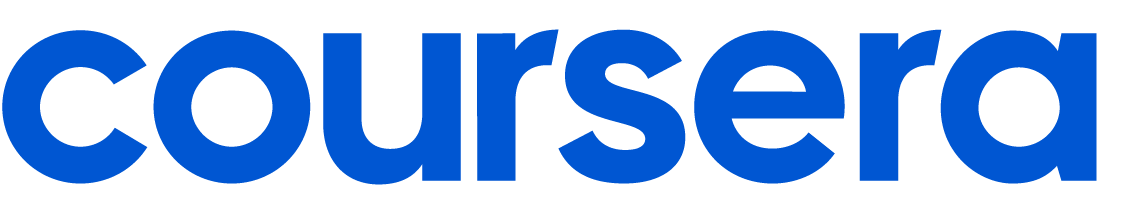

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [4]:
# Import any other packages you may want to use


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [2]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


# ------------------------------------------------------

In [5]:
onehot_columns=["SubscriptionType","PaymentMethod","PaperlessBilling","ContentType","MultiDeviceAccess","DeviceRegistered","GenrePreference","Gender","ParentalControl","SubtitlesEnabled"]

In [6]:
onehot_df=pd.get_dummies(train_df[onehot_columns])
onehot_df.head()

,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_No,PaperlessBilling_Yes,ContentType_Both,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,0,1,0,0,0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,1,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
2,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
3,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0


In [7]:
newtrain_df=pd.concat([train_df,onehot_df],axis=1)
newtrain_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,0,0,0,1,0,1,1,0,1,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,0,0,0,0,0,1,1,0,0,1
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,0,0,1,0,0,1,0,1,0,1
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,0,1,0,0,0,1,0,1,0,1
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,1,0,0,0,1,0,1,0,1,0


In [8]:
newtrain_df.drop(onehot_columns,axis=1,inplace=True)
newtrain_df.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,CustomerID,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,CB6SXPNVZA,...,0,0,0,1,0,1,1,0,1,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,S7R2G87O09,...,0,0,0,0,0,1,1,0,0,1
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,EASDC20BDT,...,0,0,1,0,0,1,0,1,0,1
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,NPF69NT69N,...,0,1,0,0,0,1,0,1,0,1
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,4LGYPK7VOL,...,1,0,0,0,1,0,1,0,1,0


In [9]:
newtrain_df.set_index("CustomerID",inplace=True)
newtrain_df.index.name=None

In [10]:
newtrain_df.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
CB6SXPNVZA,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,...,0,0,0,1,0,1,1,0,1,0
S7R2G87O09,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,...,0,0,0,0,0,1,1,0,0,1
EASDC20BDT,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,...,0,0,1,0,0,1,0,1,0,1
NPF69NT69N,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,...,0,1,0,0,0,1,0,1,0,1
4LGYPK7VOL,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,...,1,0,0,0,1,0,1,0,1,0


In [11]:
newtrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243787 entries, CB6SXPNVZA to A6IN701VRY
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   AccountAge                      243787 non-null  int64  
 1   MonthlyCharges                  243787 non-null  float64
 2   TotalCharges                    243787 non-null  float64
 3   ViewingHoursPerWeek             243787 non-null  float64
 4   AverageViewingDuration          243787 non-null  float64
 5   ContentDownloadsPerMonth        243787 non-null  int64  
 6   UserRating                      243787 non-null  float64
 7   SupportTicketsPerMonth          243787 non-null  int64  
 8   WatchlistSize                   243787 non-null  int64  
 9   Churn                           243787 non-null  int64  
 10  SubscriptionType_Basic          243787 non-null  uint8  
 11  SubscriptionType_Premium        243787 non-null  uint8  
 12  Subscrip

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

# COR

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
correlation_matrix=balanced_df.corr()

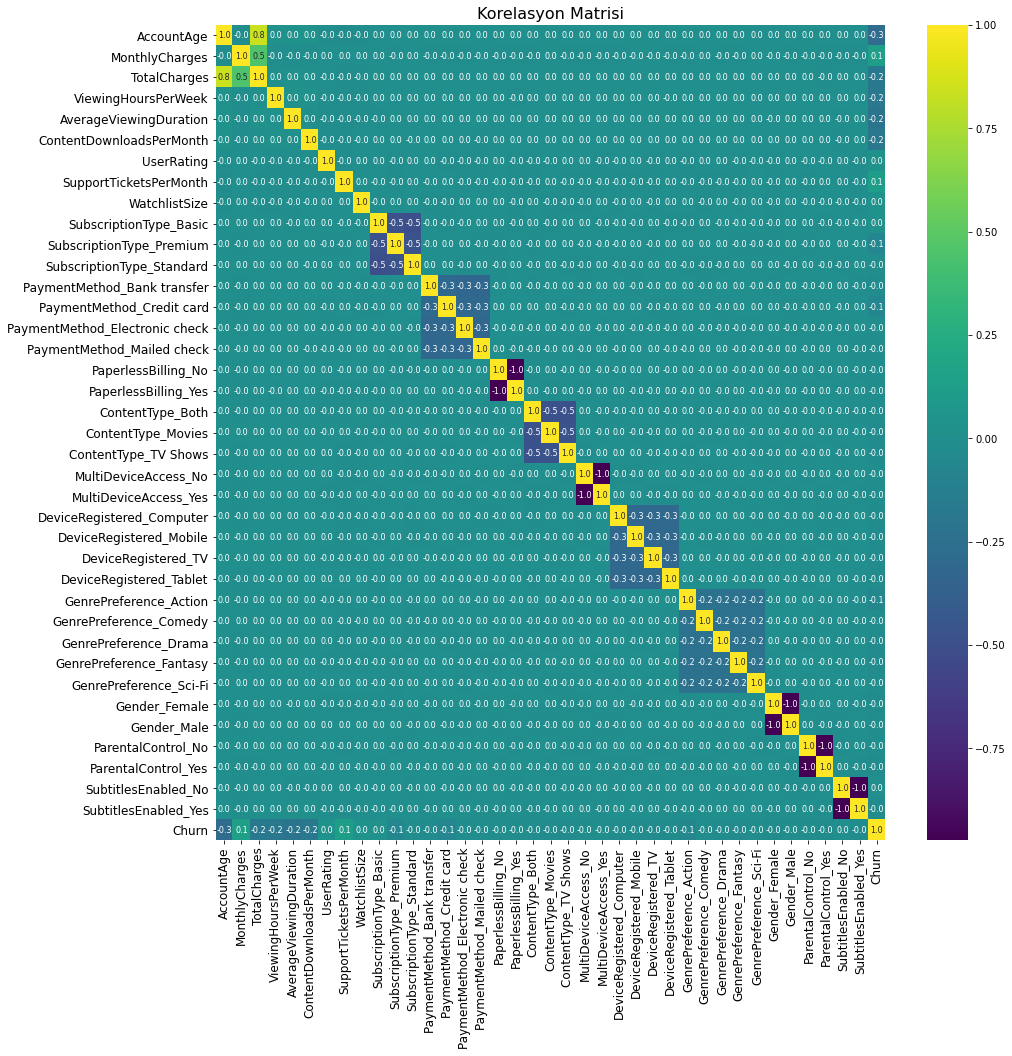

In [82]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="viridis", cbar=True, annot_kws={"size": 8})

plt.title("Korelasyon Matrisi", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [83]:
balanced_df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize', 'SubscriptionType_Basic',
       'SubscriptionType_Premium', 'SubscriptionType_Standard',
       'PaymentMethod_Bank transfer', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PaperlessBilling_No', 'PaperlessBilling_Yes', 'ContentType_Both',
       'ContentType_Movies', 'ContentType_TV Shows', 'MultiDeviceAccess_No',
       'MultiDeviceAccess_Yes', 'DeviceRegistered_Computer',
       'DeviceRegistered_Mobile', 'DeviceRegistered_TV',
       'DeviceRegistered_Tablet', 'GenrePreference_Action',
       'GenrePreference_Comedy', 'GenrePreference_Drama',
       'GenrePreference_Fantasy', 'GenrePreference_Sci-Fi', 'Gender_Female',
       'Gender_Male', 'ParentalControl_No', 'ParentalControl_Yes',
       'SubtitlesEnabled_No', 'Subtitl

In [18]:
balanced_df2=balanced_df.drop(['PaperlessBilling_No','MultiDeviceAccess_No','ParentalControl_No','SubtitlesEnabled_No','Gender_Female'],axis=1)

In [19]:
correlation_matrix2=balanced_df2.corr()

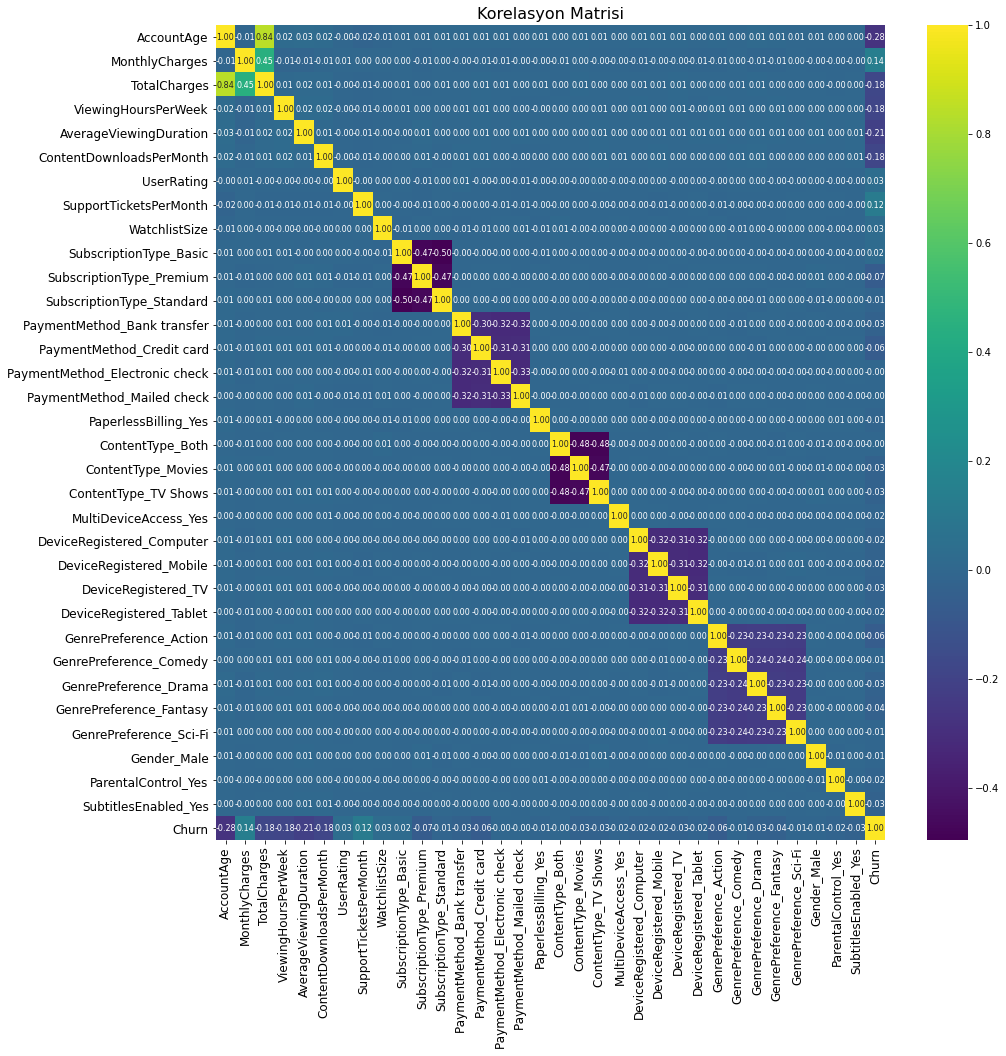

In [22]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap="viridis", cbar=True, annot_kws={"size": 8})

plt.title("Korelasyon Matrisi", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Outliers

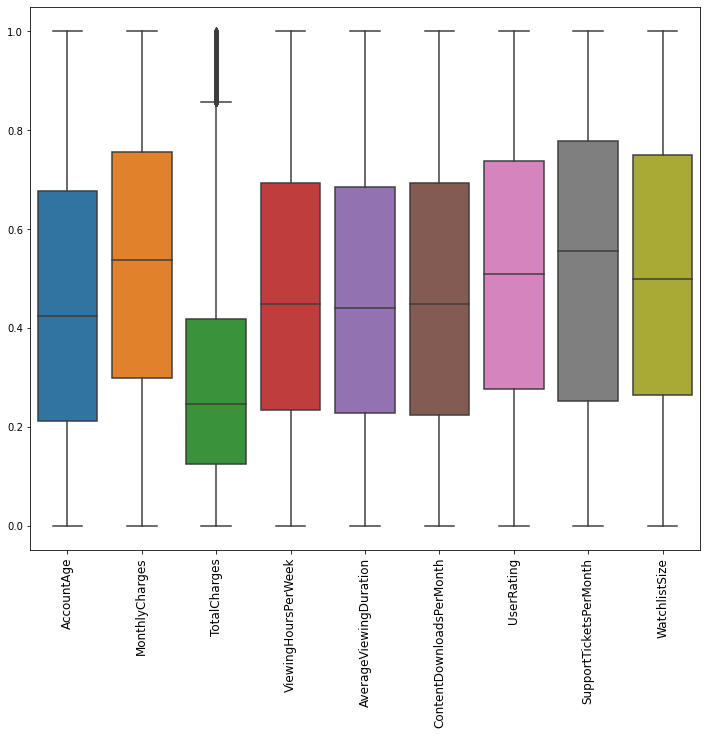

In [20]:

plt.figure(figsize=(12,10))
sns.boxplot(data=balanced_df2[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize']])
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [21]:
out_df=balanced_df2[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize']]

In [22]:
# Q1 (1. çeyrek) ve Q3 (3. çeyrek) hesaplama
Q1 = out_df.quantile(0.25)
Q3 = out_df.quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırları hesaplama
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerlerin tespit edilmesi
outliers = (out_df < lower_bound) | (out_df > upper_bound)

# Aykırı değerleri görmek için
print("Aykırı değerlerin olduğu satırlar:")
print(out_df[outliers.any(axis=1)])


Aykırı değerlerin olduğu satırlar:
        AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
126       0.932203        0.944491      0.893728             0.728572   
133       0.974576        0.964186      0.948518             0.556036   
156       0.932203        0.992467      0.927380             0.672527   
169       0.915254        0.996747      0.913581             0.046005   
227       0.889831        0.967894      0.869051             0.731968   
...            ...             ...           ...                  ...   
317257    0.924887        0.884198      0.872548             0.549041   
317963    0.905916        0.996568      0.904363             0.327052   
317972    0.967408        0.970027      0.945864             0.278342   
318290    0.930491        0.912125      0.868196             0.153842   
319191    0.942081        0.924988      0.889644             0.403462   

        AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
126             

In [23]:
outliers.index

RangeIndex(start=0, stop=319274, step=1)

In [24]:
balanced_df2.shape

(319274, 34)

In [25]:
# Aykırı değerleri çıkarma
data_cleaned = balanced_df2[~outliers.any(axis=1)]

# Temizlenmiş veriyi kontrol etme
print(data_cleaned.shape)  # Yeni veri setinin boyutları


(316009, 34)


In [26]:
data_cleaned.head(1)

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Basic,...,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes,Churn
0,0.915254,0.548842,0.60507,0.407992,0.592728,0.836735,0.091395,0.888889,0.625,1,...,1,1,0,0,0,0,0,0,1,0


# TRAIN PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:


# PCA'yı uygulamak için nesne oluşturma
pca = PCA(n_components=0.95)  # %95 varyans açıklığı
X_pca = pca.fit_transform(data_cleaned.drop(["Churn"],axis=1))  # PCA'yı veri setine uygulama


In [35]:
# Hangi bileşenlerin ne kadar varyans açıkladığını görmek
print(pca.explained_variance_ratio_)

# Toplam açıklanan varyansı görmek
print(f"Toplam Açıklanan Varyans: {sum(pca.explained_variance_ratio_)}")


[0.06095048 0.0601035  0.05873416 0.05795826 0.04631072 0.04625293
 0.04603145 0.04582247 0.04541891 0.04488137 0.04436413 0.04405048
 0.04381056 0.04350472 0.04242197 0.03553572 0.03494415 0.03446068
 0.03339861 0.02026168 0.01700924 0.01485203 0.01465416 0.01403118
 0.01375424]
Toplam Açıklanan Varyans: 0.9635177724872992


In [36]:
X_pca.shape

(316009, 25)

### TEST PCA

In [37]:

test_X_pca =pca.transform(last_test_df2)  # PCA'yı veri setine uygulama

In [38]:
test_X_pca.shape

(104480, 25)

In [39]:
test_X_pca=pd.DataFrame(test_X_pca).set_index(test_df.CustomerID)
test_X_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CustomerID,,,,,,,,,,,,,,,,,,,,,
O1W6BHP6RM,-0.032327,-0.519038,-0.657312,0.816183,0.143778,0.877846,0.360372,-0.835862,0.060603,-0.359576,...,0.785763,0.268559,-0.002883,-0.124379,0.069228,0.302404,-0.314365,0.436093,-0.328989,-0.167682
LFR4X92X8H,0.746660,-0.498911,-0.582162,-0.324194,-0.275611,-0.923467,0.305303,-0.239711,-0.664604,0.402934,...,-0.087328,-0.112082,-0.003437,0.888278,0.160167,0.339152,-0.086920,0.664917,-0.110742,0.198852
QM5GBIYODA,-0.657259,-0.439947,-0.694407,-0.498913,-0.227878,0.412302,0.141675,0.971350,0.025313,-0.102775,...,-0.501266,0.746609,-0.014799,-0.146096,-0.397066,0.290062,-0.532372,-0.060595,0.073807,-0.424876
D9RXTK2K9F,-0.617956,0.849473,-0.141713,-0.432643,-0.426586,-0.359493,0.411469,0.696720,0.430578,0.605189,...,0.850327,0.271697,-0.034863,-0.132633,0.506689,0.502093,-0.323819,0.287845,0.386938,-0.539567
ENTCCHR1LR,-0.675047,-0.431019,-0.683146,-0.457544,-0.537675,0.046934,-0.569332,0.254605,-0.687224,-0.403358,...,-0.174138,-0.451211,0.716295,-0.288290,0.316529,-0.156564,0.379051,-0.402408,0.270921,0.066194


# PCA and CatBoost

!pip install catboost

In [45]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

In [50]:
from sklearn.metrics import classification_report,roc_auc_score

In [46]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_pca, data_cleaned.Churn, test_size=0.2, random_state=42)


In [130]:

from sklearn.model_selection import GridSearchCV




In [82]:
cat = CatBoostClassifier(
    learning_rate=0.02,
    iterations=1500,
    depth=10,
    l2_leaf_reg=3,
    bagging_temperature=1.0,
    random_seed=42,
    verbose=100
)





In [83]:
# Modeli eğitin
cat.fit(X_train, y_train)



0:	learn: 0.6847028	total: 229ms	remaining: 5m 43s
100:	learn: 0.4946893	total: 23.2s	remaining: 5m 21s
200:	learn: 0.4487438	total: 46.1s	remaining: 4m 57s
300:	learn: 0.4315903	total: 1m 9s	remaining: 4m 35s
400:	learn: 0.4205795	total: 1m 32s	remaining: 4m 12s
500:	learn: 0.4109948	total: 1m 54s	remaining: 3m 48s
600:	learn: 0.4025939	total: 2m 17s	remaining: 3m 25s
700:	learn: 0.3947849	total: 2m 39s	remaining: 3m 2s
800:	learn: 0.3874128	total: 3m 1s	remaining: 2m 38s
900:	learn: 0.3799302	total: 3m 23s	remaining: 2m 15s
1000:	learn: 0.3726322	total: 3m 48s	remaining: 1m 53s
1100:	learn: 0.3656550	total: 4m 13s	remaining: 1m 31s
1200:	learn: 0.3590902	total: 4m 36s	remaining: 1m 8s
1300:	learn: 0.3527554	total: 4m 59s	remaining: 45.8s
1400:	learn: 0.3463579	total: 5m 22s	remaining: 22.8s
1499:	learn: 0.3403335	total: 5m 44s	remaining: 0us


In [84]:
# Tahmin yapın ve performans değerlendirme
y_pred = cat.predict(X_test)
y_pred_proba = cat.predict_proba(X_test)[:, 1]
print("CatBoost Model Performansı:\n", classification_report(y_test, y_pred))
print("ROC-AUC Skoru:", roc_auc_score(y_test, y_pred_proba))

CatBoost Model Performansı:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82     31462
           1       0.83      0.80      0.81     31740

    accuracy                           0.82     63202
   macro avg       0.82      0.82      0.82     63202
weighted avg       0.82      0.82      0.82     63202

ROC-AUC Skoru: 0.9045982897643057


# --------------------------------------------------------------------------------

# Starts here

# New Balanced XGBoost
Standart Scaler

!pip install xgboost

In [5]:
import pandas as pd

In [6]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

In [7]:
from sklearn.metrics import classification_report

In [8]:
train_df=pd.read_csv("std_balanced_dataset.csv")

In [21]:
train_df.head(1)

,Unnamed: 0,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,...,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes,Churn
0,122411,0.587531,-0.593104,0.090246,-1.180925,0.047932,-0.034881,-0.210265,1.564955,-0.419609,...,0,0,0,0,0,1,1,0,1,0


In [24]:
train_df=train_df.iloc[:,1:]
train_df.head(1)

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Basic,...,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes,Churn
0,0.587531,-0.593104,0.090246,-1.180925,0.047932,-0.034881,-0.210265,1.564955,-0.419609,0,...,0,0,0,0,0,1,1,0,1,0


In [25]:
test_df=pd.read_csv("stdScaled_testDF.csv")

In [26]:
test_df.head(1)

,Unnamed: 0,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,...,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,O1W6BHP6RM,-0.64357,1.245472,-0.132746,0.768149,0.585171,1.214366,0.451869,-0.871734,1.521304,...,1,0,0,1,0,0,0,1,0,0


In [27]:
test_df.set_index("Unnamed: 0",inplace=True)
test_df.index.name=None
test_df.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Basic,...,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
O1W6BHP6RM,-0.643570,1.245472,-0.132746,0.768149,0.585171,1.214366,0.451869,-0.871734,1.521304,0,...,1,0,0,1,0,0,0,1,0,0
LFR4X92X8H,0.493959,-0.591335,0.029037,1.457230,-0.702192,1.283565,-0.848209,-0.871734,1.382494,1,...,1,0,1,0,0,0,0,0,1,0
QM5GBIYODA,-1.606093,0.587450,-1.292431,-1.146318,0.943448,-0.723184,1.563345,-0.871734,1.382494,0,...,0,0,0,0,0,0,1,0,0,1
D9RXTK2K9F,0.814800,0.665570,1.158423,1.342734,1.666094,-0.723184,1.682662,-1.566978,1.521304,0,...,0,1,0,1,0,0,0,0,1,1
ENTCCHR1LR,0.902302,-0.015771,0.731175,0.268052,-0.441186,-1.276769,-0.133438,0.518755,-1.671331,0,...,0,1,0,0,1,0,0,0,0,0


In [23]:
print(f"{train_df.columns} \n {test_df.columns}")

Index(['Unnamed: 0', 'AccountAge', 'MonthlyCharges', 'TotalCharges',
       'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth',
       'WatchlistSize', 'SubscriptionType_Basic', 'SubscriptionType_Premium',
       'SubscriptionType_Standard', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaperlessBilling_Yes',
       'ContentType_Both', 'ContentType_Movies', 'ContentType_TV Shows',
       'MultiDeviceAccess_Yes', 'DeviceRegistered_Computer',
       'DeviceRegistered_Mobile', 'DeviceRegistered_TV',
       'DeviceRegistered_Tablet', 'GenrePreference_Action',
       'GenrePreference_Comedy', 'GenrePreference_Drama',
       'GenrePreference_Fantasy', 'GenrePreference_Sci-Fi', 'Gender_Male',
       'ParentalControl_Yes', 'SubtitlesEnabled_Yes', 'Churn'],
      dtype='object') 
 Index(['AccountAge', 'MonthlyCharges', 'TotalCharges

In [28]:
# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(["Churn"],axis=1), train_df.Churn, test_size=0.3, random_state=47)

In [30]:

# XGBoost modelini oluşturma
xgbmodel = xgb.XGBClassifier(
    n_estimators=500,           # Ağaç sayısı
    learning_rate=0.05,         # Öğrenme oranı
    max_depth=8,                # Maksimum ağaç derinliği
    colsample_bytree=0.8,       # Her ağacın kullanacağı özellik oranı
    subsample=0.8,              # Her iterasyonda kullanılacak veri oranı
    gamma=0.2,                  # Bölünme minimum fayda eşik değeri
    reg_alpha=0.1,              # L1 düzenlileştirme
    reg_lambda=1.0,             # L2 düzenlileştirme
    n_jobs=-1,                  # Tüm işlemci çekirdeklerini kullan
    random_state=42,            # Sonuçların tekrarlanabilirliği için sabit bir durum
    tree_method="hist"         # Daha hızlı eğitim için histogram yöntemi
    
)




In [31]:
# Modeli eğitme
xgbmodel.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],       # Doğrulama seti
    eval_metric="auc",                 # AUC metriğini kullan
    early_stopping_rounds=50,          # 50 iterasyon boyunca iyileşme olmazsa durdur
    verbose=10                         # 10 iterasyonda bir çıktı göster
)

[0]	validation_0-auc:0.85696
[10]	validation_0-auc:0.92808
[20]	validation_0-auc:0.93391
[30]	validation_0-auc:0.93697
[40]	validation_0-auc:0.93827
[50]	validation_0-auc:0.93913
[60]	validation_0-auc:0.93979
[70]	validation_0-auc:0.94033
[80]	validation_0-auc:0.94073
[90]	validation_0-auc:0.94094
[100]	validation_0-auc:0.94112
[110]	validation_0-auc:0.94117
[120]	validation_0-auc:0.94127
[130]	validation_0-auc:0.94133
[140]	validation_0-auc:0.94135
[150]	validation_0-auc:0.94138
[160]	validation_0-auc:0.94141
[170]	validation_0-auc:0.94141
[180]	validation_0-auc:0.94143
[190]	validation_0-auc:0.94139
[200]	validation_0-auc:0.94135
[210]	validation_0-auc:0.94129
[220]	validation_0-auc:0.94127
[230]	validation_0-auc:0.94124
[231]	validation_0-auc:0.94125


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0.1, ...)

In [32]:
# Tahmin yapın ve performans değerlendirme
print("TEST")
y_pred = xgbmodel.predict(X_test)
y_pred_proba = xgbmodel.predict_proba(X_test)[:, 1]
print("CatBoost Model Performansı:\n", classification_report(y_test, y_pred))
print("ROC-AUC Skoru:", roc_auc_score(y_test, y_pred_proba))

TEST
CatBoost Model Performansı:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     47702
           1       0.97      0.80      0.88     47793

    accuracy                           0.89     95495
   macro avg       0.90      0.89      0.89     95495
weighted avg       0.90      0.89      0.89     95495

ROC-AUC Skoru: 0.9414335404738315


In [33]:
# Tahmin yapın ve performans değerlendirme
print("TRAIN")
y_pred = xgbmodel.predict(X_train)
y_pred_proba = xgbmodel.predict_proba(X_train)[:, 1]
print("CatBoost Model Performansı:\n", classification_report(y_train, y_pred))
print("ROC-AUC Skoru:", roc_auc_score(y_train, y_pred_proba))

TRAIN
CatBoost Model Performansı:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91    111455
           1       0.98      0.82      0.90    111364

    accuracy                           0.91    222819
   macro avg       0.92      0.91      0.90    222819
weighted avg       0.92      0.91      0.90    222819

ROC-AUC Skoru: 0.9648282129003184
